# O quão bom é Max Verstappen? Uma análise de dados

Neste notebook, apresento uma análise de dados construída a partir de um dataset do Kaggle, previamente extraído e refinado dentro da própria codebase em que este notebook está hospedado.

O objetivo é responder, de forma analítica, à pergunta: **“O quão bom é Max Verstappen?”**
Para isso, sigo uma narrativa dedutiva, partindo de indicadores mais gerais — como número de vitórias, pódios e títulos — a fim de estabelecer um panorama inicial e nivelar o contexto para qualquer leitor: estamos, sem dúvida, diante de um dos maiores pilotos da Fórmula 1 moderna.

Em seguida, à medida que a análise se aprofunda, passo a examinar métricas mais específicas e comparativas — como consistência de desempenho, diferença em relação aos companheiros de equipe e outros fatores que ajudam a isolar variáveis externas, como o desempenho do carro ou da equipe.
O objetivo é ir além da “obviedade” dos números brutos, buscando entender até que ponto o domínio de Verstappen é reflexo do carro ou resultado do próprio piloto.

#### Avisos gerais em relação a análise:

- Os dados utilizados foram extraídos do dataset Kaggle: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
    - Ver notebook: `explore_data.ipynb` para ter acesso ao "check de sanidade" que fiz do dataset e entender um pouco de suas limitações.
- No momento da análise, o campeonado de 2025 segue em andamento e dados referentes ao mesmo não estarão presentes na análise.

## Setup da análise:

Imports, configs etc...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as fxns
import os
from pathlib import Path
import utils as fxns
from dateutil.relativedelta import relativedelta

# Caminho absoluto da raiz do projeto
project_root = Path.cwd().parent  # se o notebook está em /notebooks
os.chdir(project_root)

print("Diretório atual:", Path.cwd())

Diretório atual: b:\projetos\f1_analytics


In [2]:
from src.modules.db_reader import DbReader
from src.data_viz.plotter import Plotter
f1_db = DbReader()
plotter = Plotter()

### Importando os datasets:

In [3]:
# Corridas:

df_races = f1_db.run_query_file("data/db_queries/race_results_report.sql").drop_duplicates()
df_races['race_date'] = pd.to_datetime(df_races['race_date'])
df_races

,race_name,year,race_date,circuit_name,circuit_country,driver_id,driver_code,driver_forename,driver_surname,driver_full_name,...,finishing_position,points_scored,laps_completed,time_in_race,time_in_race_ms,fastest_lap_number,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,race_status
0,Australian Grand Prix,2008,2008-03-16,Albert Park Grand Prix Circuit,Australia,1,HAM,Lewis,Hamilton,Lewis Hamilton,...,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,Finished
1,Australian Grand Prix,2008,2008-03-16,Albert Park Grand Prix Circuit,Australia,2,HEI,Nick,Heidfeld,Nick Heidfeld,...,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,Finished
2,Australian Grand Prix,2008,2008-03-16,Albert Park Grand Prix Circuit,Australia,3,ROS,Nico,Rosberg,Nico Rosberg,...,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,Finished
3,Australian Grand Prix,2008,2008-03-16,Albert Park Grand Prix Circuit,Australia,4,ALO,Fernando,Alonso,Fernando Alonso,...,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,Finished
4,Australian Grand Prix,2008,2008-03-16,Albert Park Grand Prix Circuit,Australia,5,KOV,Heikki,Kovalainen,Heikki Kovalainen,...,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,825,MAG,Kevin,Magnussen,Kevin Magnussen,...,16,0.0,57,\N,\N,57,1,1:25.637,222.002,+1 Lap
26755,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,859,LAW,Liam,Lawson,Liam Lawson,...,17,0.0,55,\N,\N,52,12,1:28.751,214.212,Engine
26756,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,822,BOT,Valtteri,Bottas,Valtteri Bottas,...,18,0.0,30,\N,\N,14,19,1:29.482,212.462,Collision damage
26757,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,861,COL,Franco,Colapinto,Franco Colapinto,...,19,0.0,26,\N,\N,5,17,1:29.411,212.631,Engine


In [4]:
# Infos sobre pilotos:

df_drivers = f1_db.run_query_file("data/db_queries/drivers.sql").drop_duplicates()
df_drivers['dob'] = pd.to_datetime(df_drivers['dob'])
df_drivers


,driver_id,driver_code,driver_forename,driver_surname,driver_full_name,dob
0,1,HAM,Lewis,Hamilton,Lewis Hamilton,1985-01-07
1,2,HEI,Nick,Heidfeld,Nick Heidfeld,1977-05-10
2,3,ROS,Nico,Rosberg,Nico Rosberg,1985-06-27
3,4,ALO,Fernando,Alonso,Fernando Alonso,1981-07-29
4,5,KOV,Heikki,Kovalainen,Heikki Kovalainen,1981-10-19
...,...,...,...,...,...,...
856,858,SAR,Logan,Sargeant,Logan Sargeant,2000-12-31
857,859,LAW,Liam,Lawson,Liam Lawson,2002-02-11
858,860,BEA,Oliver,Bearman,Oliver Bearman,2005-05-08
859,861,COL,Franco,Colapinto,Franco Colapinto,2003-05-27


In [5]:
df_lap_times = f1_db.run_query_file("data/db_queries/lap_times_report.sql").drop_duplicates()
df_lap_times['race_date'] = pd.to_datetime(df_lap_times['race_date'])
df_lap_times

,race_name,year,race_date,circuit_name,circuit_country,driver_code,driver_forename,driver_surname,driver_full_name,driver_nationality,lap_number,position_on_lap,lap_time,lap_time_ms
0,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,VIL,Jacques,Villeneuve,Jacques Villeneuve,Canadian,1,1,1:43.702,103702
1,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,\N,Damon,Hill,Damon Hill,British,1,2,1:44.243,104243
2,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,\N,Eddie,Irvine,Eddie Irvine,British,1,3,1:44.981,104981
3,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,MSC,Michael,Schumacher,Michael Schumacher,German,1,4,1:45.188,105188
4,Australian Grand Prix,1996,1996-03-10,Albert Park Grand Prix Circuit,Australia,\N,Jean,Alesi,Jean Alesi,French,1,5,1:46.506,106506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589076,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,VER,Max,Verstappen,Max Verstappen,Dutch,58,6,1:28.780,88780
589077,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,GAS,Pierre,Gasly,Pierre Gasly,French,58,7,1:30.865,90865
589078,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,HUL,Nico,Hülkenberg,Nico Hülkenberg,German,58,8,1:30.040,90040
589079,Abu Dhabi Grand Prix,2024,2024-12-08,Yas Marina Circuit,UAE,ALO,Fernando,Alonso,Fernando Alonso,Spanish,58,9,1:28.621,88621


## Começando do começo...

Max Verstappen chegou fazendo barulho na F1, sendo o piloto mais jovem da história da F1 ao largar em uma corrida:

In [6]:
df_first_race = fxns.gerar_dataset_primeiro_evento(df_races, df_drivers)


In [7]:
df_top_10_jovens_largada = df_first_race.sort_values("idade_primeira_corrida").head(10)
df_top_10_jovens_largada

,driver_id,driver_full_name,race_name,race_date,year,circuit_name,circuit_country,race_status,finishing_position,starting_position,dob,idade_primeira_corrida
571,830,Max Verstappen,Australian Grand Prix,2015-03-15,2015,Albert Park Grand Prix Circuit,Australia,Engine,13,11,1997-09-30,17.453799
510,840,Lance Stroll,Australian Grand Prix,2017-03-26,2017,Albert Park Grand Prix Circuit,Australia,Brakes,16,20,1998-10-29,18.406571
625,860,Oliver Bearman,Saudi Arabian Grand Prix,2024-03-09,2024,Jeddah Corniche Circuit,Saudi Arabia,Finished,7,11,2005-05-08,18.836413
511,846,Lando Norris,Australian Grand Prix,2019-03-17,2019,Albert Park Grand Prix Circuit,Australia,+1 Lap,12,8,1999-11-13,19.340178
392,153,Jaime Alguersuari,Hungarian Grand Prix,2009-07-26,2009,Hungaroring,Hungary,+1 Lap,15,19,1990-03-23,19.342916
597,191,Mike Thackwell,Dutch Grand Prix,1980-08-31,1980,Circuit Park Zandvoort,Netherlands,Did not qualify,27,0,1961-03-30,19.422313
713,454,Ricardo Rodríguez,Italian Grand Prix,1961-09-10,1961,Autodromo Nazionale di Monza,Italy,Fuel system,17,2,1942-02-14,19.570157
256,4,Fernando Alonso,Australian Grand Prix,2001-03-04,2001,Albert Park Grand Prix Circuit,Australia,+2 Laps,12,19,1981-07-29,19.597536
247,74,Esteban Tuero,Australian Grand Prix,1998-03-08,1998,Albert Park Grand Prix Circuit,Australia,Engine,15,17,1978-04-22,19.876797
171,826,Daniil Kvyat,Australian Grand Prix,2014-03-16,2014,Albert Park Grand Prix Circuit,Australia,Finished,9,8,1994-04-26,19.887748


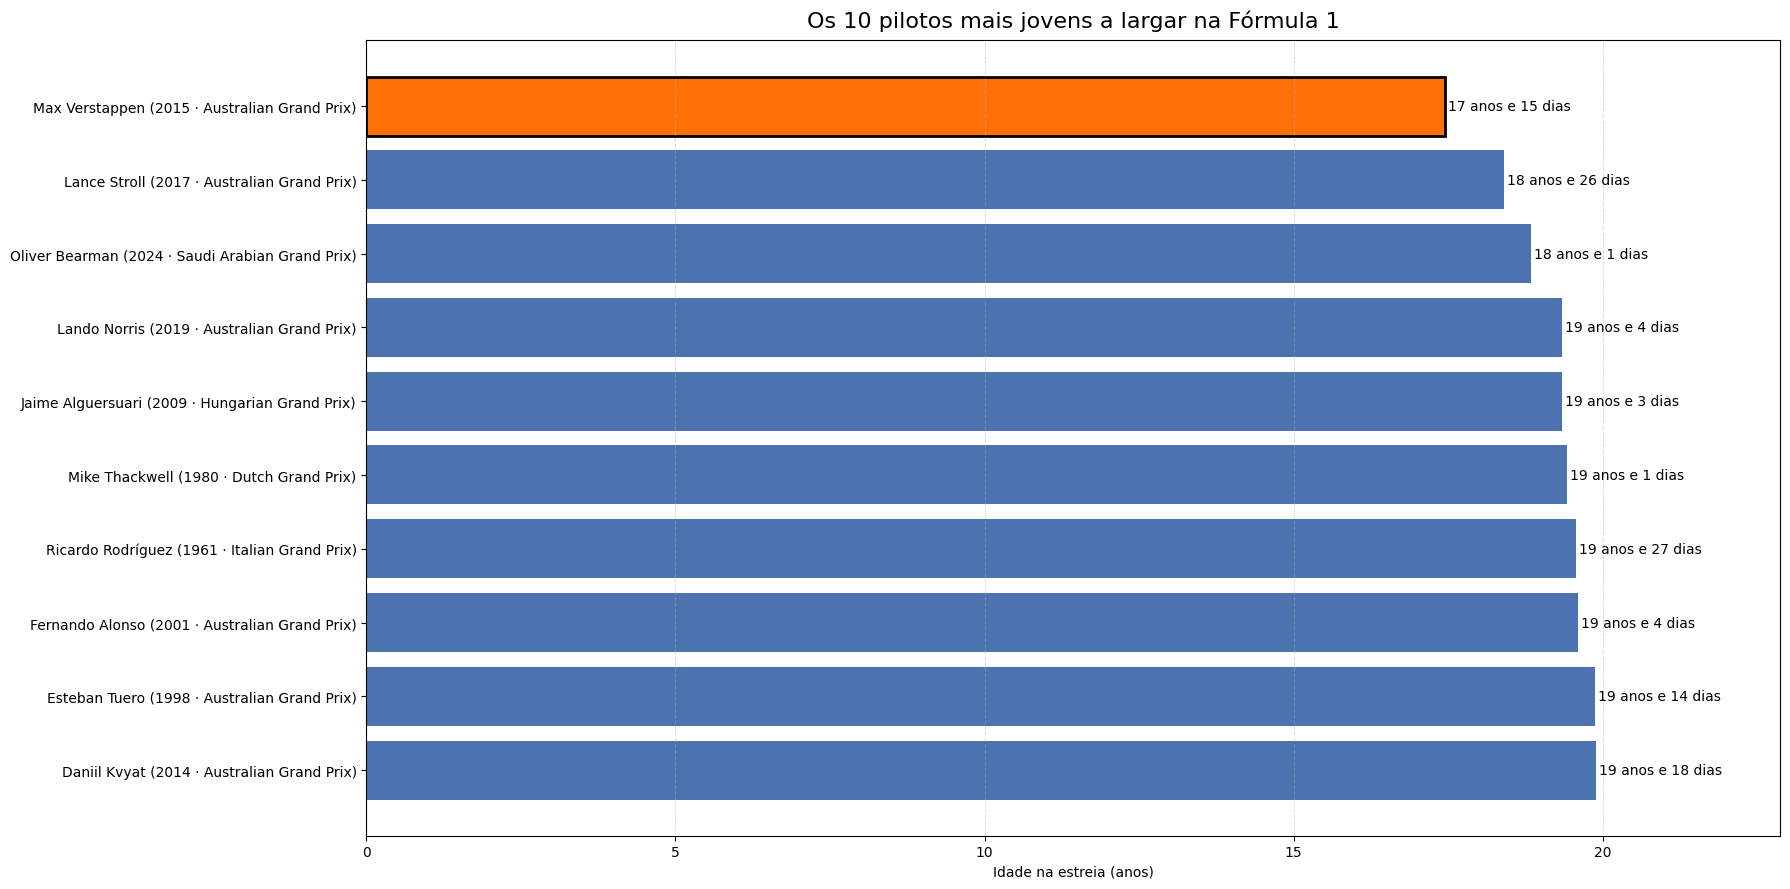

In [8]:
# Cria rótulo de idade em anos e dias
df_top_10_jovens_largada["idade_texto"] = df_top_10_jovens_largada.apply(
    lambda r: f"{relativedelta(r['race_date'], r['dob']).years} anos e {relativedelta(r['race_date'], r['dob']).days} dias",
    axis=1
)

# Nome formatado para o eixo y
df_top_10_jovens_largada["label_y"] = (
    df_top_10_jovens_largada["driver_full_name"] 
    + " (" 
    + df_top_10_jovens_largada["year"].astype(str) 
    + " · " 
    + df_top_10_jovens_largada["race_name"] 
    + ")"
)

# Plot
fig, ax = plt.subplots(figsize=(18,9))

bars = ax.barh(
    df_top_10_jovens_largada["label_y"], 
    df_top_10_jovens_largada["idade_primeira_corrida"], 
    color="#4C72B0"
)

# Destaque pro Verstappen
for bar, name in zip(bars, df_top_10_jovens_largada["driver_full_name"]):
    if "Verstappen" in name:
        bar.set_color("#FF7009")
        bar.set_linewidth(2)
        bar.set_edgecolor("black")

# Rótulos de idade ao lado das barras
for bar, label in zip(bars, df_top_10_jovens_largada["idade_texto"]):
    ax.text(
        bar.get_width() + 0.05,
        bar.get_y() + bar.get_height()/2,
        label,
        va="center", ha="left", fontsize=10
    )

# Ajustes visuais
ax.set_xlim(0, df_top_10_jovens_largada["idade_primeira_corrida"].max() * 1.15)
ax.set_title("Os 10 pilotos mais jovens a largar na Fórmula 1", fontsize=16, pad=10)
ax.set_xlabel("Idade na estreia (anos)")
ax.set_ylabel("")
ax.invert_yaxis()
ax.grid(axis="x", linestyle="--", alpha=0.4)


plt.tight_layout()
plt.show()